<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/ML-assignments/blob/Ensemble-Learning/RF_CreditRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk Classification using Random Forest

**Context:**

This is Customer Transaction and Demographic related data , It holds Risky and Not Risky customer for specific banking products

**Objective:**

To build a Random Forest model that accurately predicts credit risk for banking products using customer data and transcation, enabling the bank to make informed lending decisions, reduce losses, and improve profitability.


Data Dictionary:

payment_data.csv:

payment_data.csv: customer’s card payment history.

id: customer id

OVD_t1: number of times overdue type 1

OVD_t2: number of times overdue type 2

OVD_t3: number of times overdue type 3

OVD_sum: total overdue days

pay_normal: number of times normal payment

prod_code: credit product code

prod_limit: credit limit of product

update_date: account update date

new_balance: current balance of product

highest_balance: highest balance in history

report_date: date of recent payment

customer_data.csv:

customer’s demographic data and category attributes which have been encoded.
Category features are fea_1, fea_3, fea_5, fea_6, fea_7, fea_9.

label is 1, the customer is in high credit risk

label is 0, the customer is in low credit risk

#Importing Necessary libraries

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Loading Datasets

In [2]:
#Loading datasets
cust=pd.read_csv('/content/customer_data.csv')
cust.head()


,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [3]:
payment=pd.read_csv('/content/payment_data.csv')
payment.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016


In [4]:
print('Rows and columnsin customer data:',cust.shape)
print('Rows and columns in payment data :',payment.shape)

Rows and columnsin customer data: (1125, 13)
Rows and columns in payment data : (8250, 12)


In [5]:
print(cust.info())
print(payment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null

In [6]:
# Merging the two datasets on 'customerID' using an inner join
merged_data = pd.merge(cust, payment, on='id', how='inner')

# Displaying the first few rows of the merged dataset
merged_data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,9,10,60500.0,31/01/2015,6657.6,18934.0,19/09/2015
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,18,10,NaN,28/04/2009,153792.0,149387.0,10/08/2015
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,1,5,NaN,30/03/2009,0.0,150500.0,NaN
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,2,26,11906,6,10,NaN,17/05/2007,0.0,46371.0,12/07/2013
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,4,6,NaN,02/06/2016,15120.0,21500.0,19/04/2016


In [7]:
merged_data.shape

(8250, 24)

In [8]:
merged_data.isnull().sum()

,0
label,0
id,0
fea_1,0
fea_2,1028
fea_3,0
fea_4,0
fea_5,0
fea_6,0
fea_7,0
fea_8,0


In [9]:
merged_data.columns

Index(['label', 'id', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6',
       'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11', 'OVD_t1', 'OVD_t2',
       'OVD_t3', 'OVD_sum', 'pay_normal', 'prod_code', 'prod_limit',
       'update_date', 'new_balance', 'highest_balance', 'report_date'],
      dtype='object')

In [10]:
#Dropping date columns as they do not contribute much
merged_data.drop(columns=['update_date','report_date'],inplace=True)

In [11]:
merged_data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,244.948974,0,0,0,0,9,10,60500.0,6657.6,18934.0
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,244.948974,0,0,0,0,18,10,NaN,153792.0,149387.0
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,244.948974,0,0,0,0,1,5,NaN,0.0,150500.0
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,244.948974,0,2,26,11906,6,10,NaN,0.0,46371.0
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,207.173840,0,0,0,0,4,6,NaN,15120.0,21500.0


# Null value Imputation

In [12]:
# Imputation for 'fea_2' (numerical feature) with median:
merged_data['fea_2'].fillna(merged_data['fea_2'].median(), inplace=True)


In [13]:
# Imputation for 'prod_limit' (numerical feature) with median:
merged_data['prod_limit'].fillna(merged_data['prod_limit'].median(), inplace=True)

In [14]:
# Imputation for 'highest_balance' (numerical feature) with median:
merged_data['highest_balance'].fillna(merged_data['highest_balance'].median(), inplace=True)

In [15]:
merged_data.isnull().sum()

,0
label,0
id,0
fea_1,0
fea_2,0
fea_3,0
fea_4,0
fea_5,0
fea_6,0
fea_7,0
fea_8,0


**Observations:**
Now no null values in the dataframe

In [16]:
#Checking duplicates
merged_data.duplicated().sum()

np.int64(117)

In [17]:
#Drop duplicates
merged_data.drop_duplicates(inplace=True)

In [18]:
#Checking
merged_data.duplicated().sum()

np.int64(0)

#Descriptive statistics

In [19]:
merged_data.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
count,8133.000000,8.133000e+03,8133.000000,8133.000000,8133.000000,8.133000e+03,8133.000000,8133.000000,8133.000000,8133.000000,...,8133.000000,8133.000000,8133.000000,8133.000000,8133.000000,8133.000000,8133.000000,8133.000000,8.133000e+03,8.133000e+03
mean,0.168818,5.782506e+07,5.522808,1285.803209,2.318825,1.388309e+05,1.940243,11.029018,4.887004,100.056437,...,152.144713,0.247141,0.127136,0.373048,189.406984,14.582196,8.237182,72789.763322,1.065367e+05,2.121486e+05
std,0.374614,1.821222e+06,1.385888,48.891938,0.889511,1.081393e+05,0.237050,2.698790,3.032355,12.557615,...,121.873586,1.244330,0.863291,2.919442,1816.126241,12.048457,3.528840,38794.506164,1.901175e+06,2.763736e+06
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,-4.030320e+04,5.010000e+02
25%,0.000000,5.499032e+07,4.000000,1251.500000,1.000000,7.700000e+04,2.000000,8.000000,5.000000,90.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,68200.000000,0.000000e+00,2.440000e+04
50%,0.000000,5.898908e+07,5.000000,1283.000000,3.000000,1.120000e+05,2.000000,11.000000,5.000000,105.000000,...,183.030052,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,68200.000000,0.000000e+00,4.404700e+04
75%,0.000000,5.899659e+07,7.000000,1314.500000,3.000000,1.510000e+05,2.000000,15.000000,5.000000,111.000000,...,219.248717,0.000000,0.000000,0.000000,0.000000,25.000000,10.000000,68200.000000,2.529240e+04,1.005000e+05
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,...,707.106781,34.000000,34.000000,35.000000,31500.000000,36.000000,27.000000,660000.000000,1.632120e+08,1.800005e+08


**Observations:**

* OVD_sum: If the mean and standard deviation of OVD_sum are high, it might indicate that a significant portion of customers have overdue payments, highlighting a potential credit risk issue.

* prod_limit: The difference between the minimum and maximum values of prod_limit shows the range of credit limits assigned by the bank. The median can indicate the typical credit limit for customers.
* new_balance, highest_balance: These statistics can reveal the distribution of current and maximum outstanding balances. If the 75th percentile or maximum values are very high, it might indicate potential customers with high credit utilization and risk.
* pay_normal: A high mean and a low standard deviation for pay_normal could suggest that most customers make their payments on time, indicating lower risk.

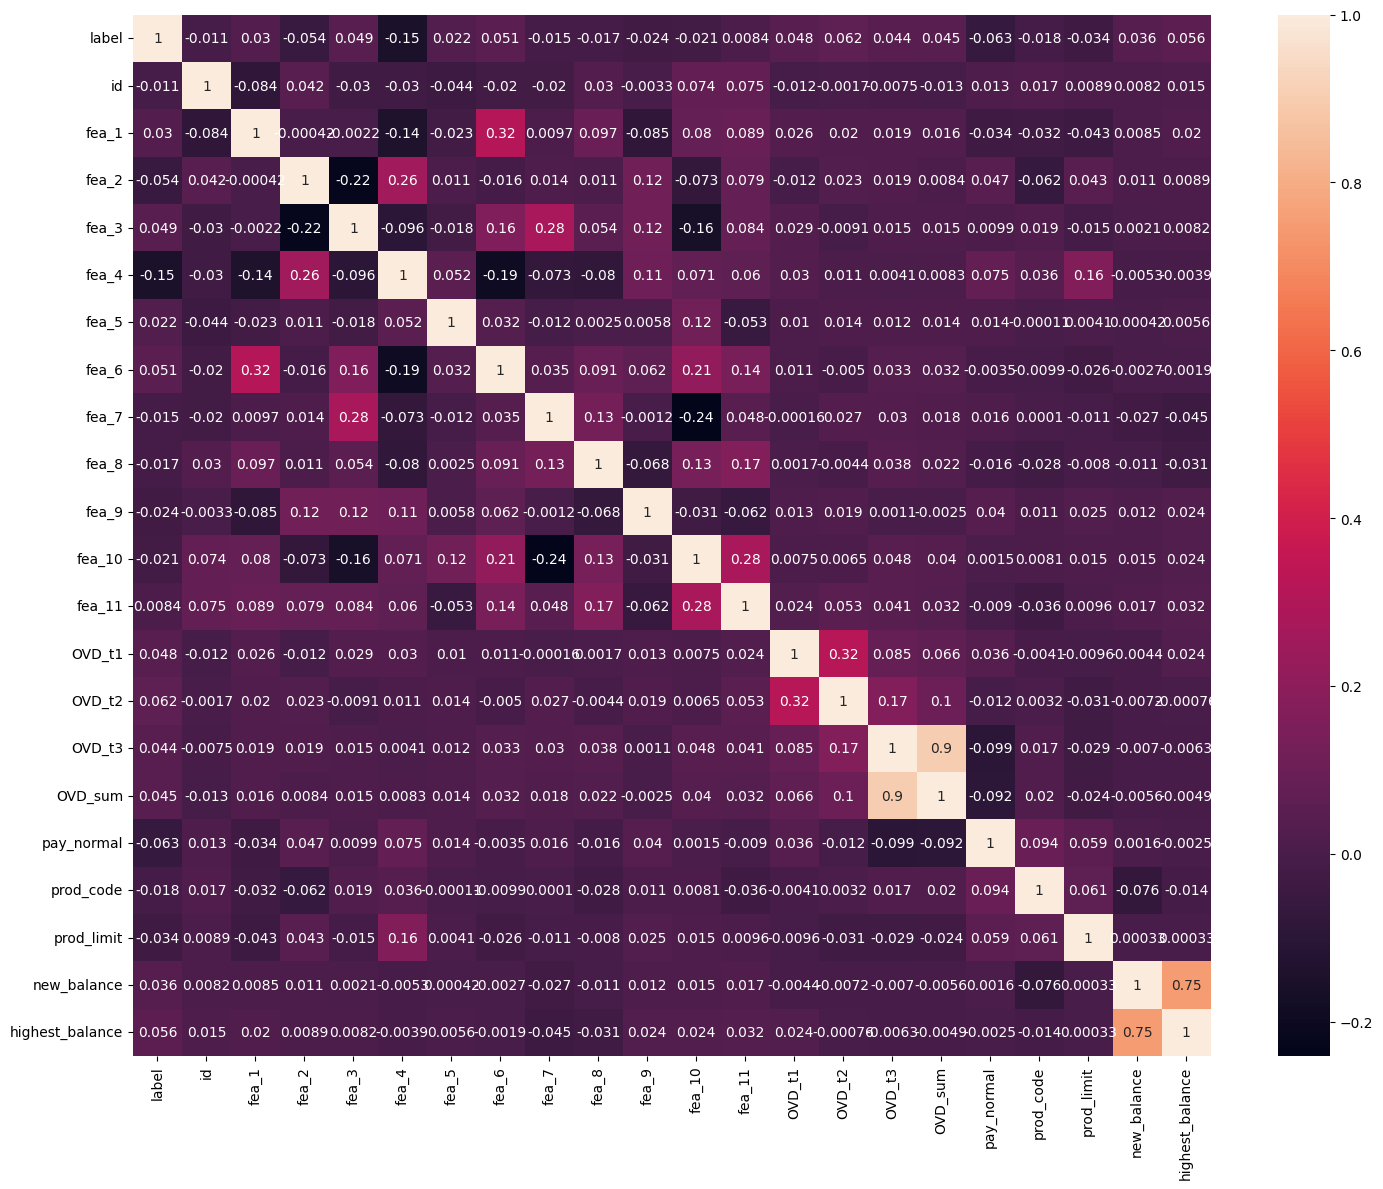

In [20]:
# checking correlation using heatmap
plt.figure(figsize=(15,12))
sns.heatmap(merged_data.corr(),annot=True)
plt.tight_layout()

**Observations:**

* Strong positive correlation: OVD_t1, OVD_t2, OVD_t3, OVD_sum are highly correlated, as expected. new_balance and highest_balance also show a strong positive correlation.
* Moderate positive correlations: Observed between some fea_ features, requiring further investigation.
* Weak/no correlation: Many features show weak or no linear relationship.
* Negative correlation: pay_normal and OVD_sum exhibit a negative correlation, indicating customers with regular payments tend to have lower overdue amounts.

#Model Building

**Seperating the input features and target feature**

In [21]:
X=merged_data.drop(columns=['id','label'])
y=merged_data['label']

#Preprocessing- Feature scaling

In [22]:
# Feature scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [23]:
X

array([[-0.3772602 , -0.82438309,  0.7658331 , ..., -0.31681081,
        -0.05253867, -0.06991496],
       [-0.3772602 , -0.82438309,  0.7658331 , ..., -0.1183169 ,
         0.02485739, -0.02271037],
       [-0.3772602 , -0.82438309,  0.7658331 , ..., -0.1183169 ,
        -0.05604072, -0.02230763],
       ...,
       [-1.0988635 ,  2.64265927,  0.7658331 , ..., -0.1183169 ,
         0.11971951,  0.79185772],
       [-1.0988635 ,  2.64265927,  0.7658331 , ..., -0.1183169 ,
         0.18387746,  0.07048478],
       [-1.0988635 ,  2.64265927,  0.7658331 , ..., -0.1183169 ,
        -0.05162654, -0.06368569]])

In [24]:
#Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
# Building Random Forest model
rf=RandomForestClassifier(n_estimators = 100 )
rf.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
# Training the data
y_train_pred=rf.predict(X_train)
y_pred=rf.predict(X_test)

#Model Evaluation

In [27]:
# Model Evaluation
print('Training Accuracy: ', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision: ', np.round(metrics.precision_score(y_train, y_train_pred), 2))
print('Training Recall: ', np.round(metrics.recall_score(y_train, y_train_pred), 2))
print('Training F1 Score: ', np.round(metrics.f1_score(y_train, y_train_pred), 2))

print('\nTesting Accuracy: ', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision: ', np.round(metrics.precision_score(y_test, y_pred), 2))
print('Testing Recall: ', np.round(metrics.recall_score(y_test, y_pred), 2))
print('Testing F1 Score: ', np.round(metrics.f1_score(y_test, y_pred), 2))

Training Accuracy:  1.0
Training Precision:  1.0
Training Recall:  1.0
Training F1 Score:  1.0

Testing Accuracy:  0.96
Testing Precision:  1.0
Testing Recall:  0.77
Testing F1 Score:  0.87


**observations:**

The model shows excellent performance overall, with high accuracy and precision on testing data. However, slightly lower recall suggests potential overfitting, and optimization might be needed to improve identification of all credit risks.

# Model Optimization

In [28]:
#Hyperparameter tuning using Grid search Cv
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [29]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [34]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9475859878552596


# Building an optimal model

In [35]:
# Train a new model with the best parameters
rf = RandomForestClassifier(**best_params, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [36]:
# Training the data
y_train_pred=rf.predict(X_train)
y_pred=rf.predict(X_test)

In [37]:
# Model Evaluation
print('Training Accuracy: ', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision: ', np.round(metrics.precision_score(y_train, y_train_pred), 2))
print('Training Recall: ', np.round(metrics.recall_score(y_train, y_train_pred), 2))
print('Training F1 Score: ', np.round(metrics.f1_score(y_train, y_train_pred), 2))

print('\nTesting Accuracy: ', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision: ', np.round(metrics.precision_score(y_test, y_pred), 2))
print('Testing Recall: ', np.round(metrics.recall_score(y_test, y_pred), 2))
print('Testing F1 Score: ', np.round(metrics.f1_score(y_test, y_pred), 2))

Training Accuracy:  1.0
Training Precision:  1.0
Training Recall:  1.0
Training F1 Score:  1.0

Testing Accuracy:  0.96
Testing Precision:  1.0
Testing Recall:  0.78
Testing F1 Score:  0.87


**Observations:**

The optimal model demonstrates excellent overall performance with high accuracy and perfect precision on testing data. While exhibiting slight overfitting, the model maintains a high F1-score, indicating a good balance between precision and recall for credit risk prediction

#Overall Conclusion

This project successfully built a robust Random Forest model for accurate credit risk prediction, enabling informed lending decisions and improved profitability for the bank. While slight overfitting was observed, the model's high performance and business value make it a valuable tool for enhanced risk management. Continued monitoring and integration are recommended for sustained impact.